# 1. 보드게임 자료 불러오기

In [1]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
import random

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD, accuracy

import warnings; warnings.simplefilter('ignore')

In [17]:
bggDF_path = "C:/Users/1-13/Desktop/boardgamegeek-reviews/bgg-13m-reviews.csv"
reviews=pd.read_csv(bggDF_path)
reviews

,Unnamed: 0,user,rating,comment,ID,name
0,0,sidehacker,10.0,NaN,13,Catan
1,1,Varthlokkur,10.0,NaN,13,Catan
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
4,4,ssmooth,10.0,NaN,13,Catan
...,...,...,...,...,...,...
13170068,3356495,pswissler,3.0,NaN,8256,LEGO Constructionary Game
13170069,3356496,Sprayoncrayon,3.0,"Lego created a version of Pictionary, only you...",8256,LEGO Constructionary Game
13170070,3356497,PhoenixSong,2.5,This game is very similar to Creationary. It c...,8256,LEGO Constructionary Game
13170071,3356498,tsantos,2.0,This game was really bad. Worst that I've pla...,8256,LEGO Constructionary Game


- 데이터 정제1 : reviews

In [19]:
reviews.isnull().sum()

Unnamed: 0           0
user                66
rating               0
comment       10532317
ID                   0
name                 0
dtype: int64

- 결측치 전부제거해줌(신뢰성있는 정보 + 많은정보줄이기)

In [49]:
reviews = reviews.dropna()

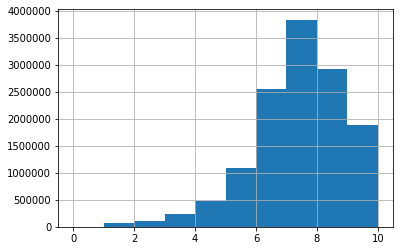

In [21]:
reviews.rating.hist()

- 데이터정제2 : info

In [14]:
bggDF_path = "C:/Users/1-13/Desktop/boardgamegeek-reviews/games_detailed_info.csv"
info=pd.read_csv(bggDF_path)
info

C:\Users\1-13\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Abstract Game Rank,Accessory Rank,Amiga Rank,Arcade Rank,Atari ST Rank,Board Game Rank,Children's Game Rank,Commodore 64 Rank,Customizable Rank,...,suggested_language_dependence,suggested_num_players,suggested_playerage,thumbnail,trading,type,usersrated,wanting,wishing,yearpublished
0,0,NaN,NaN,NaN,NaN,NaN,327,NaN,NaN,NaN,...,"[OrderedDict([('@level', '36'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/g8LvJsd...,1685,boardgame,85332,453,4729,1995
1,1,NaN,NaN,NaN,NaN,NaN,151,NaN,NaN,NaN,...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/kqE4YJS...,1477,boardgame,85052,498,5403,2000
2,2,NaN,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/HEKrtpT...,1977,boardgame,83486,614,7655,2008
3,3,NaN,NaN,NaN,NaN,NaN,45,NaN,NaN,NaN,...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/Grz-qM9...,1162,boardgame,69132,1029,9464,2010
4,4,NaN,NaN,NaN,NaN,NaN,76,NaN,NaN,NaN,...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/iPlTR5c...,1806,boardgame,68284,571,6703,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17058,17058,NaN,NaN,NaN,NaN,NaN,12961,NaN,NaN,NaN,...,NaN,"[OrderedDict([('@numplayers', '1'), ('result',...",NaN,https://cf.geekdo-images.com/thumb/img/8ssvEKd...,5,boardgame,30,2,5,2004
17059,17059,NaN,NaN,NaN,NaN,NaN,15499,NaN,NaN,NaN,...,NaN,"[OrderedDict([('@numplayers', '1'), ('result',...",NaN,https://cf.geekdo-images.com/thumb/img/VPIn350...,9,boardgame,30,2,12,2006
17060,17060,NaN,NaN,NaN,NaN,NaN,14315,NaN,NaN,NaN,...,NaN,"[OrderedDict([('@numplayers', '1'), ('result',...",NaN,https://cf.geekdo-images.com/thumb/img/w-qK2q5...,12,boardgame,30,2,3,1986
17061,17061,NaN,NaN,NaN,NaN,NaN,14317,NaN,NaN,NaN,...,NaN,"[OrderedDict([('@numplayers', '1'), ('result',...",NaN,https://cf.geekdo-images.com/thumb/img/dgf5MIp...,12,boardgame,30,7,6,1997


In [16]:
info.isnull().sum()

Unnamed: 0                           0
Abstract Game Rank               16110
Accessory Rank                   17062
Amiga Rank                       17062
Arcade Rank                      17062
Atari ST Rank                    17062
Board Game Rank                      0
Children's Game Rank             16296
Commodore 64 Rank                17062
Customizable Rank                16783
Family Game Rank                 15257
Party Game Rank                  16538
RPG Item Rank                    17062
Strategy Game Rank               15163
Thematic Rank                    16026
Video Game Rank                  17062
War Game Rank                    14142
alternate                        10140
average                              0
averageweight                        0
bayesaverage                         0
boardgameartist                   4913
boardgamecategory                  184
boardgamecompilation             16511
boardgamedesigner                  338
boardgameexpansion       

In [24]:
# 난이도(averageweight), 보드게임 카데고리, 보드게임 메카닉, 퍼블리셔, boardgameartist, boardgamedesigner

In [35]:
info['boardgamedesigner'].unique()

array(["['Klaus Teuber']", "['Klaus-Jürgen Wrede']", "['Matt Leacock']",
       ..., "['Jaime Iscar Gallego']",
       "['Frank Zuuring', 'Peter Zuuring']", "['Thomas Kotulla']"],
      dtype=object)

In [38]:
info

,Unnamed: 0,Abstract Game Rank,Accessory Rank,Amiga Rank,Arcade Rank,Atari ST Rank,Board Game Rank,Children's Game Rank,Commodore 64 Rank,Customizable Rank,...,suggested_language_dependence,suggested_num_players,suggested_playerage,thumbnail,trading,type,usersrated,wanting,wishing,yearpublished
0,0,NaN,NaN,NaN,NaN,NaN,327,NaN,NaN,NaN,...,"[OrderedDict([('@level', '36'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/g8LvJsd...,1685,boardgame,85332,453,4729,1995
1,1,NaN,NaN,NaN,NaN,NaN,151,NaN,NaN,NaN,...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/kqE4YJS...,1477,boardgame,85052,498,5403,2000
2,2,NaN,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/HEKrtpT...,1977,boardgame,83486,614,7655,2008
3,3,NaN,NaN,NaN,NaN,NaN,45,NaN,NaN,NaN,...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/Grz-qM9...,1162,boardgame,69132,1029,9464,2010
4,4,NaN,NaN,NaN,NaN,NaN,76,NaN,NaN,NaN,...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/iPlTR5c...,1806,boardgame,68284,571,6703,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17058,17058,NaN,NaN,NaN,NaN,NaN,12961,NaN,NaN,NaN,...,NaN,"[OrderedDict([('@numplayers', '1'), ('result',...",NaN,https://cf.geekdo-images.com/thumb/img/8ssvEKd...,5,boardgame,30,2,5,2004
17059,17059,NaN,NaN,NaN,NaN,NaN,15499,NaN,NaN,NaN,...,NaN,"[OrderedDict([('@numplayers', '1'), ('result',...",NaN,https://cf.geekdo-images.com/thumb/img/VPIn350...,9,boardgame,30,2,12,2006
17060,17060,NaN,NaN,NaN,NaN,NaN,14315,NaN,NaN,NaN,...,NaN,"[OrderedDict([('@numplayers', '1'), ('result',...",NaN,https://cf.geekdo-images.com/thumb/img/w-qK2q5...,12,boardgame,30,2,3,1986
17061,17061,NaN,NaN,NaN,NaN,NaN,14317,NaN,NaN,NaN,...,NaN,"[OrderedDict([('@numplayers', '1'), ('result',...",NaN,https://cf.geekdo-images.com/thumb/img/dgf5MIp...,12,boardgame,30,7,6,1997


In [125]:
bggDF_path = "C:/Users/1-13/Desktop/boardgamegeek-reviews/2019-05-02.csv"
rank=pd.read_csv(bggDF_path)
rank

,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,174430,Gloomhaven,2017,1,8.90,8.611,24574,/boardgame/174430/gloomhaven,https://cf.geekdo-images.com/micro/img/8JYMPXd...
1,161936,Pandemic Legacy: Season 1,2015,2,8.64,8.489,30921,/boardgame/161936/pandemic-legacy-season-1,https://cf.geekdo-images.com/micro/img/KbAKyhb...
2,182028,Through the Ages: A New Story of Civilization,2015,3,8.53,8.258,15551,/boardgame/182028/through-ages-new-story-civil...,https://cf.geekdo-images.com/micro/img/APvZ_BY...
3,167791,Terraforming Mars,2016,4,8.40,8.242,38331,/boardgame/167791/terraforming-mars,https://cf.geekdo-images.com/micro/img/71v8jF5...
4,12333,Twilight Struggle,2005,5,8.33,8.175,34268,/boardgame/12333/twilight-struggle,https://cf.geekdo-images.com/micro/img/uStZr7_...
...,...,...,...,...,...,...,...,...,...
17060,16398,War,0,17061,2.23,3.930,1140,/boardgame/16398/war,https://cf.geekdo-images.com/micro/img/8bYRQxZ...
17061,7316,Bingo,1530,17062,2.76,3.865,1794,/boardgame/7316/bingo,https://cf.geekdo-images.com/micro/img/-TpHvxJ...
17062,5048,Candy Land,1949,17063,3.17,3.756,3393,/boardgame/5048/candy-land,https://cf.geekdo-images.com/micro/img/rMTgLRC...
17063,5432,Chutes and Ladders,200,17064,2.81,3.566,3111,/boardgame/5432/chutes-and-ladders,https://cf.geekdo-images.com/micro/img/WMWtnGB...


# 2. 추천 시스템 

# 1) 컨텐츠 기반 추천  
- 보드게임 설명 기반 추천 : 코사인 유사도 활용

- 보드게임 제목을 알아보자 : primary

In [111]:
info.primary

0                                                    Catan
1                                              Carcassonne
2                                                 Pandemic
3                                                7 Wonders
4                                                 Dominion
                               ...                        
17058                                      Immer oben auf!
17059                           Antarctica (first edition)
17060                                           Jade König
17061    Perfidious Albion: Napoleon's (Hypothetical) I...
17062                            LEGO Constructionary Game
Name: primary, Length: 17063, dtype: object

- 보드게임 설명을 알아보자 : description

In [113]:
info.description

0        In Catan (formerly The Settlers of Catan), pla...
1        Carcassonne is a tile-placement game in which ...
2        In Pandemic, several virulent diseases have br...
3        You are the leader of one of the 7 great citie...
4        (from the back of the box:)&#10;&#10;&quot;You...
                               ...                        
17058    A children's game that appears to involve stac...
17059    Global warming has melted the great ice sheets...
17060    This game is set in the Southern American jung...
17061    (from the game : )&#10;&#10;&quot;Perfidious A...
17062    &quot;The LEGO Game of Charades&quot; -- It is...
Name: description, Length: 17063, dtype: object

- 설명에 비어있는 자료 발견! 채워넣자 -> 한개밖에 없다. 제목으로 채워넣자...

In [114]:
info.description = info.description.fillna('sports')

- 토큰 만들기

In [96]:
# n-그램:단어장 생성에 사용할 토큰의 크기를 결정한다. 모노그램(1-그램)은 토큰 하나만 단어로 사용하며 바이그램(2-그램)은 두 개의 연결된 토큰을 하나의 단어로 사용한다.
# Stop Words:문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다. 보통 영어의 관사나 접속사, 한국어의 조사 등이 여기에 해당한다. stop_words 인수로 조절할 수 있다.
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(info['description'])

In [97]:
print(tfidf_matrix[10])

  (0, 339430)	0.047506553993787795
  (0, 644265)	0.07475181294373341
  (0, 351795)	0.07475181294373341
  (0, 380197)	0.07475181294373341
  (0, 787537)	0.0717364407642465
  (0, 177368)	0.07475181294373341
  (0, 339514)	0.07475181294373341
  (0, 851287)	0.07475181294373341
  (0, 721661)	0.0717364407642465
  (0, 380223)	0.07475181294373341
  (0, 82695)	0.07475181294373341
  (0, 721800)	0.06543523667822489
  (0, 721622)	0.06959700015527348
  (0, 788030)	0.06959700015527348
  (0, 696316)	0.07475181294373341
  (0, 739827)	0.06793752109478357
  (0, 351796)	0.06793752109478357
  (0, 421958)	0.07475181294373341
  (0, 8705)	0.05512561110130501
  (0, 782015)	0.059767336126836705
  (0, 177125)	0.06959700015527348
  (0, 606226)	0.06959700015527348
  (0, 338996)	0.06543523667822489
  (0, 722929)	0.06959700015527348
  (0, 989530)	0.06793752109478357
  :	:
  (0, 697388)	0.17993670281244628
  (0, 380188)	0.05567673896173465
  (0, 339429)	0.06427615192858178
  (0, 757717)	0.03852427323652073
  (0, 88434

In [117]:
tfidf_matrix.shape

(17063, 1015855)

- 코사인 유사도 측정 : linear_kernel 사용

In [99]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [100]:
cosine_sim[0]

array([1.        , 0.03504892, 0.03186914, ..., 0.00916656, 0.01744667,
       0.00691459])

In [101]:
info = info.reset_index()
titles = info['primary']
indices = pd.Series(info.index, index=info['primary'])

print(titles.head(), indices.head())

0          Catan
1    Carcassonne
2       Pandemic
3      7 Wonders
4       Dominion
Name: primary, dtype: object primary
Catan          0
Carcassonne    1
Pandemic       2
7 Wonders      3
Dominion       4
dtype: int64


In [102]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [172]:
get_recommendations('Chess').head(100)
# 키워드 위주로 관련도 높은 항목들이 나타나는것을 볼수있다.

7739                        No Stress Chess
4256                     All The King's Men
6336                          Martian Chess
4259                         4 Player Chess
13729                              Schachen
6151                             Six Making
14946                         Stealth Chess
4733                         Bughouse Chess
8150                                 Shuuro
4389                               Bosworth
9462                              Chess 960
14627                     Sceptre 1027 A.D.
14226                           Omega Chess
6220                                Proteus
13051                             Paco Ŝako
16431                       Hexagonal Chess
14281                                Makruk
732                        Chinese Checkers
10858    LOKA: A Game of Elemental Strategy
12900                          Knight Moves
14910                  Warmaster Chess 2000
9827                                Changgi
435                             

# 2) 협업 필터링

In [166]:
reader = Reader()

In [167]:
reviews.head()

,Unnamed: 0,user,rating,comment,ID,name
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
7,7,hreimer,10.0,i will never tire of this game.. Awesome,13,Catan
11,11,daredevil,10.0,This is probably the best game I ever played. ...,13,Catan
16,16,hurkle,10.0,Fantastic game. Got me hooked on games all ove...,13,Catan


In [168]:
data = Dataset.load_from_df(reviews[['user', 'name','rating']], reader)
trainset = data.build_full_trainset()
testset = trainset.build_testset()

In [169]:
svd = SVD()
svd.fit(trainset)
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 2.5282


2.528177829010097

In [179]:
reviews[reviews['user'] == 'hreimer']

,Unnamed: 0,user,rating,comment,ID,name
7,7,hreimer,10.0,i will never tire of this game.. Awesome,13,Catan
153425,153936,hreimer,6.0,A solid game.,822,Carcassonne
1401918,1405916,hreimer,8.0,A well balanced trading game. Im a big fan of ...,11,Bohnanza
1972008,1977703,hreimer,6.0,A 6 because it is a classic. So much luck invo...,181,Risk
2215032,2221482,hreimer,10.0,I own several chess boards/games.. the greates...,171,Chess
...,...,...,...,...,...,...
11467010,1646120,hreimer,4.0,"Another ""Party Game"" no strategy.. not my cup ...",1254,Crack the Case
11657939,1837656,hreimer,8.0,A ton of fun.,210,Don Pepe
11768949,1949073,hreimer,9.0,You get 4 people together who love chess... an...,2173,4 Player Chess
12345532,2528332,hreimer,10.0,With the right crowd....BRILLIANT,317,The Mob


In [189]:
svd.predict('cypar7', 'Pandemic',3)

Prediction(uid='cypar7', iid='Pandemic', r_ui=3, est=4.775171427112456, details={'was_impossible': False})

In [155]:
# 5월 7일 수료일

# 3) 하이브리드 추천 시스템(Hybrid Recommender)

In [190]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

FileNotFoundError: [Errno 2] File b'../input/links_small.csv' does not exist: b'../input/links_small.csv'

In [160]:
indices_map = id_map.set_index('id')


NameError: name 'id_map' is not defined

In [161]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = smd.iloc[movie_indices][['title','vote_count','vote_average','year','id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [162]:
hybrid(1, 'Avatar')


KeyError: 'Avatar'

In [163]:
hybrid(500, 'Avatar')


KeyError: 'Avatar'